<a href="https://colab.research.google.com/github/Sutapa94/Delhivery-Feature-Engineering/blob/main/Delhivery_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Delhivery Case Study:**

**Business Problem:**

1. Clean, sanitize and manipulate data to get useful features out of raw fields

2. Make sense out of the raw data and help the data science team to build forecasting models on it


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [42]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from category_encoders import TargetEncoder

In [44]:
#downloading csv file for analysis
!gdown --fuzzy https://drive.google.com/file/d/1QIAZ3Of5JmHXpNFN9NeMiTlikuCnB2F2/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1QIAZ3Of5JmHXpNFN9NeMiTlikuCnB2F2
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 220MB/s]


In [45]:
#Read file through Pandas
df = pd.read_csv("/content/delhivery_data.csv")
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

Manipulating raw data for better EDA and analysis 

In [47]:
df["location_level_grouping"] = df["trip_uuid"]+df["source_center"]+df["destination_center"]
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,location_level_grouping
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB


In [48]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
location_level_grouping             0
dtype: int64

In [49]:
df_new = df.drop(["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis=1)
df_new


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,location_level_grouping
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320IND388121AAAIND388620AAB
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320IND388121AAAIND388620AAB
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320IND388121AAAIND388620AAB
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320IND388121AAAIND388620AAB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,trip-153746066843555182IND131028AABIND000000ACB
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,trip-153746066843555182IND131028AABIND000000ACB
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,trip-153746066843555182IND131028AABIND000000ACB
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,trip-153746066843555182IND131028AABIND000000ACB


In [50]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [51]:
df_new = df_new.groupby("location_level_grouping").agg({"data":"first",
                                               'trip_creation_time' :"first",
                                               'route_schedule_uuid' :"first",
                                               'route_type' :"first",
                                               'trip_uuid' :"first",
                                               'source_center' :"first",
                                               'source_name' :"first",
                                               'destination_center' :"last",
                                               'destination_name' :"last",
                                               'od_start_time' :"first", 
                                               'od_end_time' :"first",
                                               'start_scan_to_end_scan' :"first",
                                               'actual_distance_to_destination' :"last",
                                               'actual_time' :"last",
                                               'osrm_time' :"last", 
                                               'osrm_distance' :"last", 
                                               'segment_actual_time' :"sum",
                                               'segment_osrm_time' :"sum", 
                                               'segment_osrm_distance' :"sum",
                                               }).reset_index()

In [52]:
df_new

,location_level_grouping,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [53]:
df_new['od_start_time'] = pd.to_datetime(df_new['od_start_time'])
df_new['od_end_time'] = pd.to_datetime(df_new['od_end_time'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   location_level_grouping         26368 non-null  object        
 1   data                            26368 non-null  object        
 2   trip_creation_time              26368 non-null  object        
 3   route_schedule_uuid             26368 non-null  object        
 4   route_type                      26368 non-null  object        
 5   trip_uuid                       26368 non-null  object        
 6   source_center                   26368 non-null  object        
 7   source_name                     26302 non-null  object        
 8   destination_center              26368 non-null  object        
 9   destination_name                26287 non-null  object        
 10  od_start_time                   26368 non-null  datetime64[ns]
 11  od

In [54]:
df_new["od_total_duration_by_hour"] = (df_new["od_end_time"]-df_new["od_start_time"]).dt.total_seconds()/(60)
df_new


,location_level_grouping,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_duration_by_hour
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.604421
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.505379
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.832388
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.779486
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,62.115193
26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,91.087797
26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,44.174403
26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,287.474007


In [55]:
df_new = df_new.groupby("trip_uuid").agg({"data":"first",
                                               'trip_creation_time' :"first",
                                               'route_schedule_uuid' :"first",
                                               'route_type' :"first",
                                               'source_center' :"first",
                                               'source_name' :"first",
                                               'destination_center' :"last",
                                               'destination_name' :"last",
                                               'od_total_duration_by_hour' :"sum", 
                                               'start_scan_to_end_scan' :"sum",
                                               'actual_distance_to_destination' :"sum",
                                               'actual_time' :"sum",
                                               'osrm_time' :"sum", 
                                               'osrm_distance' :"sum", 
                                               'segment_actual_time' :"sum",
                                               'segment_osrm_time' :"sum", 
                                               'segment_osrm_distance' :"sum",
                                               }).reset_index()

In [56]:
df_new

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.362520,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.028928,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.590521,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


EDA

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14817 non-null  object 
 1   data                            14817 non-null  object 
 2   trip_creation_time              14817 non-null  object 
 3   route_schedule_uuid             14817 non-null  object 
 4   route_type                      14817 non-null  object 
 5   source_center                   14817 non-null  object 
 6   source_name                     14807 non-null  object 
 7   destination_center              14817 non-null  object 
 8   destination_name                14809 non-null  object 
 9   od_total_duration_by_hour       14817 non-null  float64
 10  start_scan_to_end_scan          14817 non-null  float64
 11  actual_distance_to_destination  14817 non-null  float64
 12  actual_time                     

In [58]:
df_new.describe()

,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,531.697682,530.810016,164.477838,357.143754,161.384018,204.344689,353.892286,180.949787,223.201161
std,658.868299,658.705957,305.388147,561.396157,271.360995,370.395573,556.247965,314.542047,416.628374
min,23.461468,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900
25%,149.930591,149.000000,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500
50%,280.765626,280.000000,48.474072,149.000000,60.000000,65.618800,147.000000,65.000000,70.154400
75%,638.199071,637.000000,164.583208,370.000000,168.000000,208.475000,367.000000,185.000000,218.802400
max,7898.551955,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400


In [59]:
df_new.describe(include="object")

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name
count,14817,14817,14817,14817,14817,14817,14807,14817,14809
unique,14817,2,14817,1504,2,938,933,1042,1034
top,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1,10654,1,53,8908,1063,1063,821,821


In [60]:
df_new.isnull().sum()

trip_uuid                          0
data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
od_total_duration_by_hour          0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
dtype: int64

In [61]:
df_new.shape

(14817, 18)

Checking for outliers

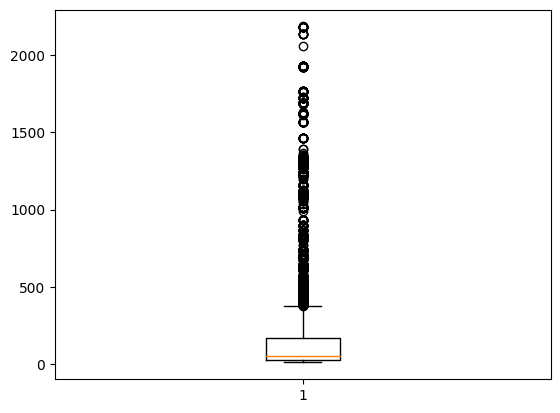

<Figure size 1000x700 with 0 Axes>

In [62]:
plt.boxplot(df_new["actual_distance_to_destination"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [63]:
Q3 = np.quantile(df_new["actual_distance_to_destination"], 0.75)
Q1 = np.quantile(df_new["actual_distance_to_destination"], 0.25)
IQR1 = Q3-Q1
lower_limit = Q1 - 1.5*IQR1
upper_limit = Q3 + 1.5*IQR1
print("IQR_actual_distance_to_destination ", IQR1)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_actual_distance_to_destination  141.74596857981817
lower_limit  -189.78171381113404
upper_limit  377.2021605081386


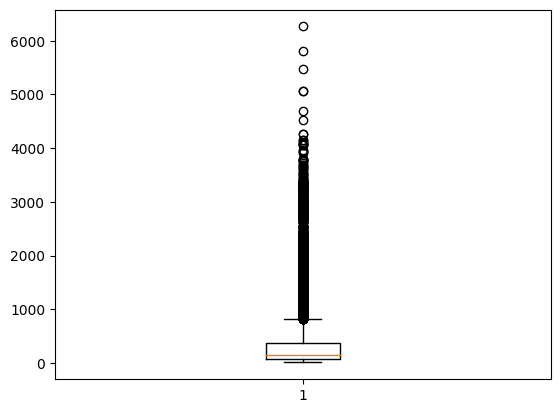

<Figure size 1000x700 with 0 Axes>

In [64]:
plt.boxplot(df_new["actual_time"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [65]:
Q3 = np.quantile(df_new["actual_time"], 0.75)
Q1 = np.quantile(df_new["actual_time"], 0.25)
IQR2 = Q3-Q1
lower_limit = Q1 - 1.5*IQR2
upper_limit = Q3 + 1.5*IQR2
print("IQR_actual_time ", IQR2)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_actual_time  303.0
lower_limit  -387.5
upper_limit  824.5


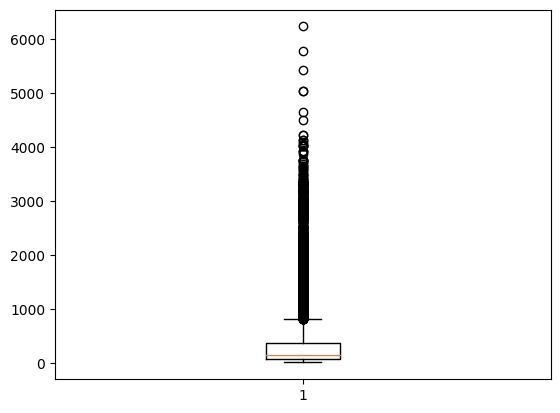

<Figure size 1000x700 with 0 Axes>

In [66]:
plt.boxplot(df_new["segment_actual_time"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [67]:
Q3 = np.quantile(df_new["segment_actual_time"], 0.75)
Q1 = np.quantile(df_new["segment_actual_time"], 0.25)
IQR3 = Q3-Q1
lower_limit = Q1 - 1.5*IQR3
upper_limit = Q3 + 1.5*IQR3
print("IQR_segment_actual_time ", IQR3)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_segment_actual_time  301.0
lower_limit  -385.5
upper_limit  818.5


IQR Tests for Outliners :

#IQR_actual_distance_to_destination

IQR_actual_distance_to_destination  141.74596857981817

lower_limit  -189.78171381113404

upper_limit  377.2021605081386


#IQR_actual_time
IQR_actual_time  303.0

lower_limit  -387.5

upper_limit  824.5

#IQR_segment_actual_time
IQR_segment_actual_time  301.0

lower_limit  -385.5

upper_limit  818.5

Calculating date, time from trip_creation_time column

In [68]:
df_new["trip_creation_time"] = pd.to_datetime(df_new["trip_creation_time"])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  object        
 2   trip_creation_time              14817 non-null  datetime64[ns]
 3   route_schedule_uuid             14817 non-null  object        
 4   route_type                      14817 non-null  object        
 5   source_center                   14817 non-null  object        
 6   source_name                     14807 non-null  object        
 7   destination_center              14817 non-null  object        
 8   destination_name                14809 non-null  object        
 9   od_total_duration_by_hour       14817 non-null  float64       
 10  start_scan_to_end_scan          14817 non-null  float64       
 11  ac

In [69]:
df_new["year"] = df_new["trip_creation_time"].dt.year
df_new["month"] = df_new["trip_creation_time"].dt.month
df_new["day"] = df_new["trip_creation_time"].dt.day
df_new["week"] = df_new["trip_creation_time"].dt.week
df_new

<ipython-input-69-23113d3514aa>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_new["week"] = df_new["trip_creation_time"].dt.week


,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,week
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,...,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2018,9,12,37
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,...,143.0,68.0,85.1110,141.0,65.0,84.1894,2018,9,12,37
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.362520,...,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,2018,9,12,37
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,...,59.0,15.0,19.6800,59.0,16.0,19.8766,2018,9,12,37
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,...,341.0,117.0,146.7918,340.0,115.0,146.7919,2018,9,12,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.028928,...,83.0,62.0,73.4630,82.0,62.0,64.8551,2018,10,3,40
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.590521,...,21.0,12.0,16.0882,21.0,11.0,16.0883,2018,10,3,40
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,...,282.0,48.0,58.9037,281.0,88.0,104.8866,2018,10,3,40
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,...,264.0,179.0,171.1103,258.0,221.0,223.5324,2018,10,3,40


Removing null values

In [70]:
df_new.isnull().sum()

trip_uuid                          0
data                               0
trip_creation_time                 0
route_schedule_uuid                0
route_type                         0
source_center                      0
source_name                       10
destination_center                 0
destination_name                   8
od_total_duration_by_hour          0
start_scan_to_end_scan             0
actual_distance_to_destination     0
actual_time                        0
osrm_time                          0
osrm_distance                      0
segment_actual_time                0
segment_osrm_time                  0
segment_osrm_distance              0
year                               0
month                              0
day                                0
week                               0
dtype: int64

In [71]:
df_new.dropna(inplace=True)
df_new.isnull().sum()

trip_uuid                         0
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_total_duration_by_hour         0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
year                              0
month                             0
day                               0
week                              0
dtype: int64

Calculating destination state, city from destination_name column

In [72]:
state = []
city=[]
date_after_split = df_new["destination_name"].str.split(r'\(|\)')
for i in date_after_split:
  state.append(i[1])
  city.append(i[0].split('_')[0])

df_new["state"] = state
df_new["city"] = city





In [73]:
df_new.tail()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,week,state,city
14812,trip-153861095625827784,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),258.028928,...,73.4630,82.0,62.0,64.8551,2018,10,3,40,Punjab,Chandigarh
14813,trip-153861104386292051,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.590521,...,16.0882,21.0,11.0,16.0883,2018,10,3,40,Haryana,Faridabad
14814,trip-153861106442901555,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),422.119867,...,58.9037,281.0,88.0,104.8866,2018,10,3,40,Uttar Pradesh,Kanpur
14815,trip-153861115439069069,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),348.512862,...,171.1103,258.0,221.0,223.5324,2018,10,3,40,Tamil Nadu,Tirchchndr
14816,trip-153861118270144424,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),354.407571,...,80.5787,274.0,67.0,80.5787,2018,10,3,40,Karnataka,Sandur


In [74]:
df_new.head(30)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,week,state,city
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,...,991.3523,1548.0,1008.0,1320.4733,2018,9,12,37,Uttar Pradesh,Kanpur
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,...,85.1110,141.0,65.0,84.1894,2018,9,12,37,Karnataka,Doddablpur
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.362520,...,2354.0665,3308.0,1941.0,2545.2678,2018,9,12,37,Haryana,Gurgaon
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,...,19.6800,59.0,16.0,19.8766,2018,9,12,37,Maharashtra,Mumbai
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,...,146.7918,340.0,115.0,146.7919,2018,9,12,37,Karnataka,Sandur
5,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),190.487849,...,28.0647,60.0,23.0,28.0647,2018,9,12,37,Tamil Nadu,Chennai
6,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.005634,...,12.0184,24.0,13.0,12.0184,2018,9,12,37,Tamil Nadu,Chennai
7,trip-153671066826362165,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),146.838397,...,28.9203,64.0,34.0,28.9203,2018,9,12,37,Karnataka,HBR Layout PC
8,trip-153671074033284934,training,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,IND395009AAA,Surat_Central_D_12 (Gujarat),IND395004AAB,Surat_Central_D_3 (Gujarat),280.843997,...,30.9359,161.0,29.0,30.9358,2018,9,12,37,Gujarat,Surat
9,trip-153671079956500691,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),49.333390,...,9.9566,23.0,14.0,16.0860,2018,9,12,37,Delhi,Delhi


In [75]:
df_new[df_new["city"]=="Mumbai Antop Hill "]["city"].count()

2

In [76]:
df_new= df_new.replace(["Bangalore","PNQ Rahatani DPC ","PNQ Vadgaon Sheri DPC ","PNQ Pashan DPC ","Pune Balaji Nagar ","HBR Layout PC ","Bhopal MP Nagar ","Mumbai Antop Hill "],["Bengaluru", "Pune","Pune","Pune","Pune","Bengaluru","Bhopal","Mumbai"])
df_new.head(30)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_total_duration_by_hour,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,week,state,city
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2260.109800,...,991.3523,1548.0,1008.0,1320.4733,2018,9,12,37,Uttar Pradesh,Kanpur
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),181.611874,...,85.1110,141.0,65.0,84.1894,2018,9,12,37,Karnataka,Doddablpur
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3934.362520,...,2354.0665,3308.0,1941.0,2545.2678,2018,9,12,37,Haryana,Gurgaon
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.494935,...,19.6800,59.0,16.0,19.8766,2018,9,12,37,Maharashtra,Mumbai
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),718.349042,...,146.7918,340.0,115.0,146.7919,2018,9,12,37,Karnataka,Sandur
5,trip-153671055416136166,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),190.487849,...,28.0647,60.0,23.0,28.0647,2018,9,12,37,Tamil Nadu,Chennai
6,trip-153671066201138152,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.005634,...,12.0184,24.0,13.0,12.0184,2018,9,12,37,Tamil Nadu,Chennai
7,trip-153671066826362165,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),146.838397,...,28.9203,64.0,34.0,28.9203,2018,9,12,37,Karnataka,Bengaluru
8,trip-153671074033284934,training,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,IND395009AAA,Surat_Central_D_12 (Gujarat),IND395004AAB,Surat_Central_D_3 (Gujarat),280.843997,...,30.9359,161.0,29.0,30.9358,2018,9,12,37,Gujarat,Surat
9,trip-153671079956500691,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),49.333390,...,9.9566,23.0,14.0,16.0860,2018,9,12,37,Delhi,Delhi


In [77]:
df_new = df_new.drop(["trip_creation_time","destination_name"], axis=1)
df_new


,trip_uuid,data,route_schedule_uuid,route_type,source_center,source_name,destination_center,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,week,state,city
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,2260.109800,2259.0,824.732854,...,991.3523,1548.0,1008.0,1320.4733,2018,9,12,37,Uttar Pradesh,Kanpur
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,181.611874,180.0,73.186911,...,85.1110,141.0,65.0,84.1894,2018,9,12,37,Karnataka,Doddablpur
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,3934.362520,3933.0,1927.404273,...,2354.0665,3308.0,1941.0,2545.2678,2018,9,12,37,Haryana,Gurgaon
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,100.494935,100.0,17.175274,...,19.6800,59.0,16.0,19.8766,2018,9,12,37,Maharashtra,Mumbai
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,718.349042,717.0,127.448500,...,146.7918,340.0,115.0,146.7919,2018,9,12,37,Karnataka,Sandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,test,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,258.028928,257.0,57.762332,...,73.4630,82.0,62.0,64.8551,2018,10,3,40,Punjab,Chandigarh
14813,trip-153861104386292051,test,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,60.590521,60.0,15.513784,...,16.0882,21.0,11.0,16.0883,2018,10,3,40,Haryana,Faridabad
14814,trip-153861106442901555,test,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,422.119867,421.0,38.684839,...,58.9037,281.0,88.0,104.8866,2018,10,3,40,Uttar Pradesh,Kanpur
14815,trip-153861115439069069,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,348.512862,347.0,134.723836,...,171.1103,258.0,221.0,223.5324,2018,10,3,40,Tamil Nadu,Tirchchndr


Univariate Analysis

<Axes: xlabel='state'>

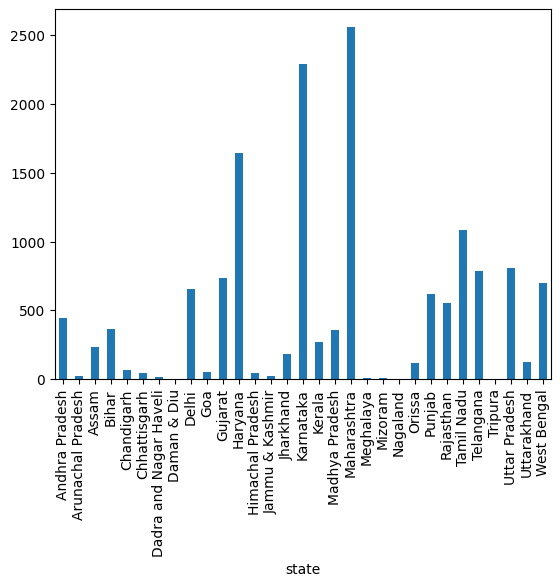

In [78]:
df_new.groupby("state")["trip_uuid"].count().plot(kind="bar")

<Axes: xlabel='month'>

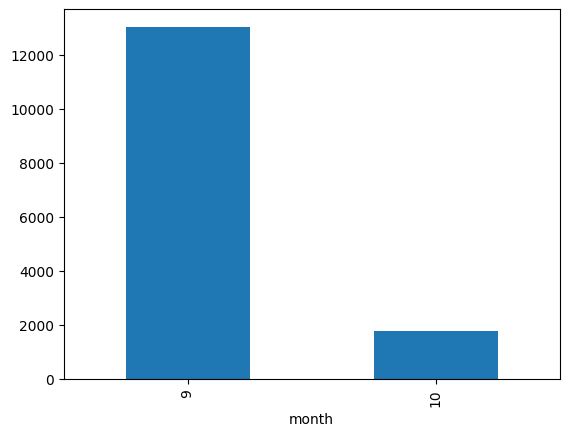

In [79]:
df_new.groupby("month")["trip_uuid"].count().plot(kind="bar")

In [80]:
df_new["delay"] = df_new["osrm_time"]-df_new["actual_time"]
df_new.head()

,trip_uuid,data,route_schedule_uuid,route_type,source_center,source_name,destination_center,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,week,state,city,delay
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,2260.109800,2259.0,824.732854,...,1548.0,1008.0,1320.4733,2018,9,12,37,Uttar Pradesh,Kanpur,-845.0
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,181.611874,180.0,73.186911,...,141.0,65.0,84.1894,2018,9,12,37,Karnataka,Doddablpur,-75.0
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,3934.362520,3933.0,1927.404273,...,3308.0,1941.0,2545.2678,2018,9,12,37,Haryana,Gurgaon,-1607.0
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,100.494935,100.0,17.175274,...,59.0,16.0,19.8766,2018,9,12,37,Maharashtra,Mumbai,-44.0
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,718.349042,717.0,127.448500,...,340.0,115.0,146.7919,2018,9,12,37,Karnataka,Sandur,-224.0


<Axes: xlabel='data'>

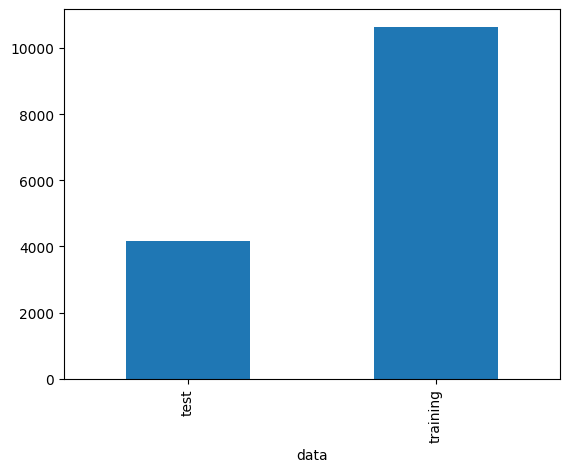

In [81]:
df_new.groupby("data")["data"].count().plot(kind="bar")

<Axes: xlabel='week'>

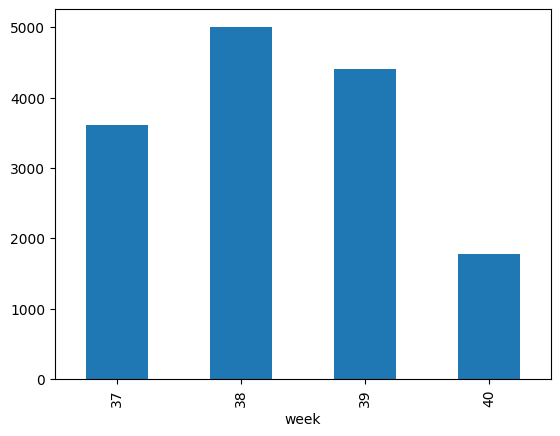

In [82]:
df_new.groupby("week")["trip_uuid"].count().plot(kind="bar")

In [83]:
df_new.head()

,trip_uuid,data,route_schedule_uuid,route_type,source_center,source_name,destination_center,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day,week,state,city,delay
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,2260.109800,2259.0,824.732854,...,1548.0,1008.0,1320.4733,2018,9,12,37,Uttar Pradesh,Kanpur,-845.0
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,181.611874,180.0,73.186911,...,141.0,65.0,84.1894,2018,9,12,37,Karnataka,Doddablpur,-75.0
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,3934.362520,3933.0,1927.404273,...,3308.0,1941.0,2545.2678,2018,9,12,37,Haryana,Gurgaon,-1607.0
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,100.494935,100.0,17.175274,...,59.0,16.0,19.8766,2018,9,12,37,Maharashtra,Mumbai,-44.0
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,718.349042,717.0,127.448500,...,340.0,115.0,146.7919,2018,9,12,37,Karnataka,Sandur,-224.0


In [84]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14800 entries, 0 to 14816
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14800 non-null  object 
 1   data                            14800 non-null  object 
 2   route_schedule_uuid             14800 non-null  object 
 3   route_type                      14800 non-null  object 
 4   source_center                   14800 non-null  object 
 5   source_name                     14800 non-null  object 
 6   destination_center              14800 non-null  object 
 7   od_total_duration_by_hour       14800 non-null  float64
 8   start_scan_to_end_scan          14800 non-null  float64
 9   actual_distance_to_destination  14800 non-null  float64
 10  actual_time                     14800 non-null  float64
 11  osrm_time                       14800 non-null  float64
 12  osrm_distance                   

#H0 = actual_distance_to_destination and osrm_distance are same

#Ha = both are different

#alpha = 0.05 

In [85]:
alpha = 0.05
actual_distance_to_destination =df_new["actual_distance_to_destination"].values
osrm_distance = df_new["osrm_distance"].values
t_stat,p_value = ttest_ind(actual_distance_to_destination,osrm_distance,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


As per above p_value and alpha we are rejecting null hypothesis testing. 

That means actual distance to destination is not similar to algorithm generated distance.

algorithm needs to be improved

#H0 = actual_time and osrm_time are same

#Ha = both are different

#alpha = 0.05 

In [86]:
alpha = 0.05
actual_time =df_new["actual_time"].values
osrm_time = df_new["osrm_time"].values
t_stat,p_value = ttest_ind(actual_time,osrm_time,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


As per above p_value and alpha we are rejecting null hypothesis testing.

That means actual time taken to destination is not similar to algorithm generated time.

algorithm needs to be improved

#H0 = actual_time and segment_actual_time are same

#Ha = both are different

#alpha = 0.05

In [87]:
alpha = 0.05
actual_time =df_new["actual_time"].values
segment_actual_time = df_new["segment_actual_time"].values
t_stat,p_value = ttest_ind(actual_time,segment_actual_time,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


As per above p_value and alpha we are fail to rejecting null hypothesis testing.

That means actual time taken to destination is similar to segment actual time taken


#H0 = osrm_time and segment_osrm_time are same

#Ha = both are different

#alpha = 0.05

In [88]:
alpha = 0.05
segment_osrm_time =df_new["segment_osrm_time"].values
osrm_time = df_new["osrm_time"].values
t_stat,p_value = ttest_ind(segment_osrm_time,osrm_time,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


As per above p_value and alpha we are rejecting null hypothesis testing.

That means segment osrm time taken is not similar to algorithm generated time.

algorithm needs to be improved

#H0 = osrm_distance and segment_osrm_distance are same

#Ha = both are different

#alpha = 0.05

In [89]:
alpha = 0.05
segment_osrm_distance =df_new["segment_osrm_distance"].values
osrm_distance = df_new["osrm_distance"].values
t_stat,p_value = ttest_ind(segment_osrm_distance,osrm_distance,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


As per above p_value and alpha we are rejecting null hypothesis testing.

That means segment osrm distance is not similar to algorithm generated distance.

algorithm needs to be improved

#H0= 9th month and 10th month delivery packages counts are similar

#Ha= 9th month and 10th month delivery packages counts are different

#alpha=0.05

In [90]:
alpha = 0.05
nineth_month = df_new[df_new["month"]=="9"]["trip_uuid"].values
tenth_month = df_new[df_new["month"]=="10"]["trip_uuid"].values
t_stat,p_value = ttest_ind(nineth_month,tenth_month,alternative="two-sided")
if(p_value<alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


As per above p_value and alpha we are fail to reject null hypothesis testing.

That means 9th month and 10th month having different package counts


#Handling categorical values 

In [91]:
df_new["route_type"].value_counts()

Carting    8906
FTL        5894
Name: route_type, dtype: int64

In [92]:
#as we have only two values for route_type we will use label encoder
label_encoder = LabelEncoder()
col = "route_type"
df_new[col] = label_encoder.fit_transform(df_new[col])
df_new[col].value_counts()

0    8906
1    5894
Name: route_type, dtype: int64

#Column Normalization /Column Standardization

In [93]:
num_col = ['od_total_duration_by_hour','start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time','segment_osrm_distance',
           'segment_osrm_time','delay']
scaler = StandardScaler()
std_data = scaler.fit_transform(df_new[num_col])
std_data = pd.DataFrame(std_data,columns = df_new[num_col].columns)

In [94]:
std_data

,od_total_duration_by_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_distance,segment_osrm_time,delay
0,2.623144,2.623454,2.160648,2.145243,2.046199,2.123421,2.145792,2.632098,2.627782,-2.087443
1,-0.531580,-0.532810,-0.299138,-0.381574,-0.344319,-0.322100,-0.382853,-0.333835,-0.368793,0.388437
2,5.164309,5.164863,5.769657,5.323797,5.814305,5.800749,5.308844,5.570467,5.592580,-4.537599
3,-0.654699,-0.654264,-0.482462,-0.531153,-0.539538,-0.498668,-0.530223,-0.488126,-0.524500,0.488115
4,0.283074,0.282444,-0.121541,-0.028995,-0.163833,-0.155653,-0.025213,-0.183647,-0.209907,-0.090662
...,...,...,...,...,...,...,...,...,...,...
14795,-0.415595,-0.415912,-0.349622,-0.488416,-0.366419,-0.353533,-0.488887,-0.380219,-0.378326,0.562070
14796,-0.715266,-0.714990,-0.487900,-0.598820,-0.550588,-0.508360,-0.598516,-0.497214,-0.540389,0.600655
14797,-0.166540,-0.166933,-0.412062,-0.134056,-0.417987,-0.392821,-0.131247,-0.284181,-0.295705,-0.122816
14798,-0.278260,-0.279277,-0.097729,-0.166109,0.064537,-0.090028,-0.172582,0.000459,0.126929,0.356282


#Insights:
1.We can see Karnataka and Maharashtra States are having high no of package delivery compared to other states

2.As per this case study data we can see 9th month having high load compared to 10th month

3.As per data we can see 38th & 39th week having high load compared other week

4.As per hypothesis testing we can see actual time and distance is not matching with algorithm given time and distance

5.As per hypothesis testing we can see segment time and distance is not matching with algorithm given time and distance

6.As per hypothesis testing we can see actual time is matching with segment time

7.As per hypothesis testing we can see 9th and 10th month having similar no of delivery counts


#Recommendations:
1.We need to give better facilities in other state so that trafic can increase in other state as well. 

2.For karnataka and maharashtra state traffic is very high so make sure we provide customer satisfaction with on time delivery

3.We can see our algorithm needs to improve a lot. Make sure to enhance the data and upgrade

4.We know 9th & 10th month that is september & october are festive season so we are getting high counts. make sure to have on-time delivery 